In [2]:
import os

In [3]:
DATA_DIR = './data_colab/food/'

if not os.path.exists(DATA_DIR):
  %unzip ./data_colab.zip

In [6]:
x_train_dir = os.path.join(DATA_DIR, 'train/img')
y_train_dir = os.path.join(DATA_DIR, 'train/masks_machine')
y_train_human_dir = os.path.join(DATA_DIR, 'train/masks_human')


x_valid_dir = os.path.join(DATA_DIR, 'valid/img')
y_valid_dir = os.path.join(DATA_DIR, 'valid/masks_machine')
y_valid_human_dir = os.path.join(DATA_DIR, 'valid/masks_human')

x_test_dir = os.path.join(DATA_DIR, 'test/img')
y_test_dir = os.path.join(DATA_DIR, 'test/masks_machine')
y_test_human_dir = os.path.join(DATA_DIR, 'test/masks_human')

In [7]:
import matplotlib.pyplot as plt

def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

rand_num = 10

image_dir = x_train_dir
image_ids = os.listdir(x_train_dir)
image_fps = [os.path.join(image_dir, image_id) for image_id in image_ids]
print(image_fps)

test_random_image = cv2.imread(image_fps[rand_num], 0)
print(test_random_image.dtype)
print(test_random_image.shape)
print(test_random_image)

masks_dir = y_train_dir
mask_ids = os.listdir(y_train_dir)
masks_fps = [os.path.join(masks_dir, mask_id) for mask_id in mask_ids]
print(masks_fps)

test_random_mask = cv2.imread(masks_fps[rand_num], 0)
print(test_random_mask.dtype)
print(test_random_mask.shape)
print(test_random_mask)

masks_human_dir = y_train_human_dir
mask_human_ids = os.listdir(y_train_human_dir)
masks_human_fps = [os.path.join(masks_human_dir, mask_id) for mask_id in mask_human_ids]
print(masks_human_fps)

test_random_human_mask = cv2.imread(masks_human_fps[rand_num], 0)
print(test_random_human_mask.dtype)
print(test_random_human_mask.shape)
print(test_random_human_mask)

['./data_colab/food/train/img/61fa5bcc-6c56-4f4a-ba28-fb5acbaa93d4.jpg', './data_colab/food/train/img/3c8d37a5-f683-4ee9-aacf-1cf916060c5f.jpg', './data_colab/food/train/img/a8bdbecd-3d77-427f-8cf2-ac10d4207831.jpg', './data_colab/food/train/img/65c4b9e0-1a00-45b2-9bfb-e80e875ecb73.jpg', './data_colab/food/train/img/6104721b-41b2-4ba1-939f-d76c4ccd9b2b.jpg', './data_colab/food/train/img/44671625-3c1f-46ba-9657-2c802f5f7d0f.jpg', './data_colab/food/train/img/7abff44b-dd77-4fdf-a746-d33365368b31.jpg', './data_colab/food/train/img/b12f4a1c-ac7d-46f9-b032-4d810425d993.jpg', './data_colab/food/train/img/105a7cff-b093-4a36-9caa-a96c9aaea60e.jpg', './data_colab/food/train/img/81dae851-59ae-4540-b176-9a532c1d7f14.jpg', './data_colab/food/train/img/0955f5b4-5bd0-4f95-83a8-c0b1aa7726e3.jpg', './data_colab/food/train/img/79ba2dc6-d067-4332-a30a-f31d5e7fedd5.jpg', './data_colab/food/train/img/511bf320-d4b1-45d4-a6d5-1182af35c98a.jpg', './data_colab/food/train/img/b1e8e32c-a5d3-41de-aa89-ab083c5d63

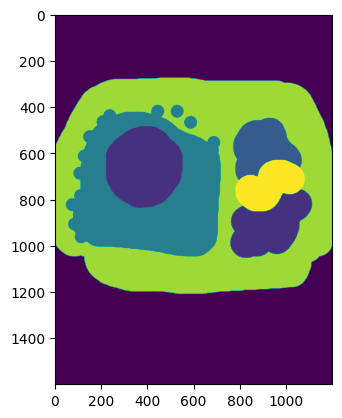

In [11]:
image = cv2.imread('./data_colab/food/train/img/61fa5bcc-6c56-4f4a-ba28-fb5acbaa93d4.jpg')
mask = cv2.imread('./data_colab/food/train/masks_machine/61fa5bcc-6c56-4f4a-ba28-fb5acbaa93d4.png',0) # cv2.IMREAD_UNCHANGED or 0
human_mask = cv2.imread('./data_colab/food/train/masks_human/61fa5bcc-6c56-4f4a-ba28-fb5acbaa93d4.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
human_mask = cv2.cvtColor(human_mask, cv2.COLOR_BGR2RGB)

plt.imshow(mask)
plt.show()

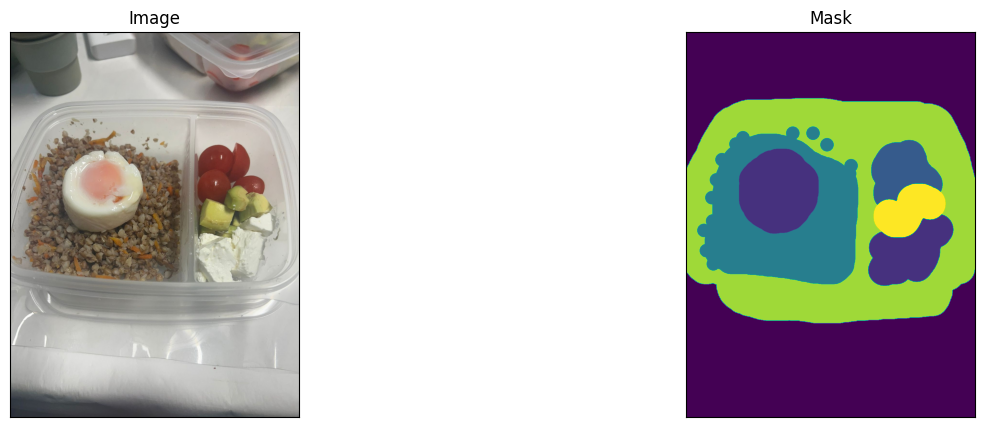

In [12]:
visualize(image=image,mask=mask)

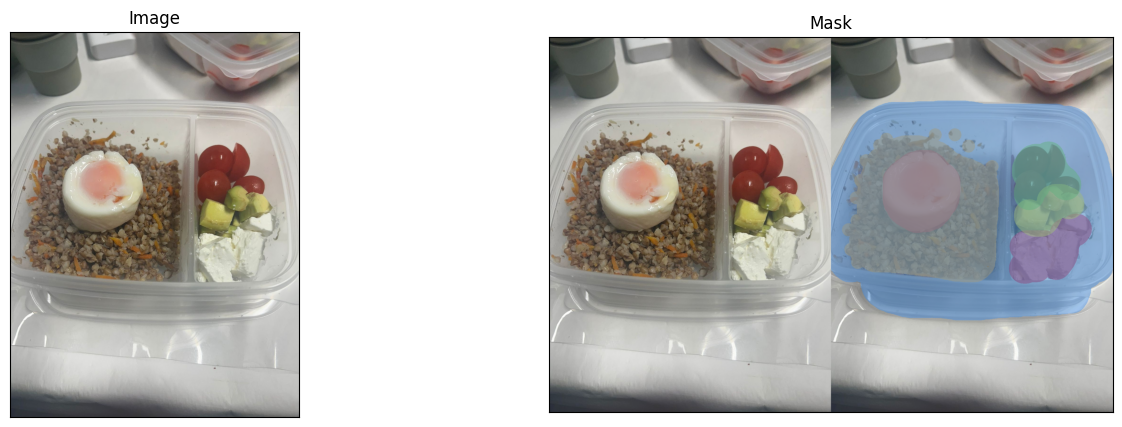

In [13]:
visualize(image=image,mask=human_mask)

In [90]:
def get_file_extension(img_path, img):
      if os.path.splitext(os.path.basename(os.path.join(img_path, img)))[1]:
            return os.path.splitext(os.path.basename(os.path.join(img_path, img)))[1]
      return ''

def get_mask_name(img_path, img, file_extension = ".png"):
      mask_filename = os.path.splitext(os.path.basename(os.path.join(img_path, img)))[0]
      mask = mask_filename.join(["", file_extension])
      return mask

In [97]:
images_dir = x_valid_dir
masks_dir = y_valid_dir

ids = os.listdir(images_dir)
# we need this crutch for .ds_store files
ids = [i for i in ids if get_file_extension(images_dir, i,) == '.jpg']
mask_ids = [get_mask_name(images_dir, i, ".png") for i in ids if get_file_extension(images_dir, i,) == '.jpg']

images_fps = [os.path.join(images_dir, image_id) for image_id in ids]
masks_fps = [os.path.join(masks_dir, mask_id) for mask_id in mask_ids]

In [98]:
for i in range(len(images_fps)):
    img = cv2.imread(images_fps[i])
    mask_img = cv2.imread(masks_fps[i], cv2.IMREAD_UNCHANGED)
    print(masks_fps[i])
    print(images_fps[i])

./data_colab/food/valid/masks_machine/fb925f90-ca04-4f72-96e0-27ac451241bc.png
./data_colab/food/valid/img/fb925f90-ca04-4f72-96e0-27ac451241bc.jpg
./data_colab/food/valid/masks_machine/f773a153-449c-4e24-b2ae-10d14d788151.png
./data_colab/food/valid/img/f773a153-449c-4e24-b2ae-10d14d788151.jpg
./data_colab/food/valid/masks_machine/fdacb09f-0eab-4b79-b765-5a7d3637ae58.png
./data_colab/food/valid/img/fdacb09f-0eab-4b79-b765-5a7d3637ae58.jpg
./data_colab/food/valid/masks_machine/ff958fbf-db3c-4de2-b627-7a8e0bdbb774.png
./data_colab/food/valid/img/ff958fbf-db3c-4de2-b627-7a8e0bdbb774.jpg
./data_colab/food/valid/masks_machine/fbcafded-3fe3-4cd8-97ee-d652c52320a4.png
./data_colab/food/valid/img/fbcafded-3fe3-4cd8-97ee-d652c52320a4.jpg
